In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt


In [ ]:
image = Image.open("j.jpeg")

In [ ]:
tensor_image = tf.convert_to_tensor(image)

In [ ]:
print(tensor_image.shape)

(1280, 1004, 3)


In [ ]:

class ImagenGris(keras.layers.Layer):
    def __init__(self, input_dim):
        super().__init__()
        self.total = self.add_weight(
            initializer="zeros", shape=(input_dim,), trainable=False
        )

    def call(self, inputs):
        grayscale_image = inputs.convert("L")
        tensor_image = tf.convert_to_tensor(grayscale_image)
        print(tensor_image.shape)
        return tensor_image

In [ ]:
ImagenGris(1)(image)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras import activations
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time
import matplotlib.pyplot as plt
from keras import regularizers

#Para escribir logs en wandb
#pip install wandb
#wandb login

learning_rate = 0.001
epochs = 300
batch_size = 120

#import wandb
#from wandb.keras import WandbCallback
#wandb.init(project="tensor1")
#wandb.config.learning_rate = learning_rate
#wandb.config.epochs = epochs
#wandb.config.batch_size = batch_size
#wandb.config.patito = "cuacCuac"
###################


dataset=mnist.load_data()



(x_train, y_train), (x_test, y_test) = dataset
data_number=10000
x_train = x_train[:data_number]
y_train = y_train[:data_number]
x_test = x_test[:data_number]
y_test = y_test[:data_number]
print(x_train.shape)
x_trainv = x_train/255
x_testv = x_test/255

x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')
num_classes=10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

prob=0.2
reg = keras.regularizers.L1L2(l1=0.0001, l2=0.0001)
model = Sequential()
model.add(ImagenGris(2))
model.add(Dropout(prob))
model.add(Dense(50, activation='relu',kernel_regularizer=reg))
model.add(Dropout(prob))
model.add(Dense(30, activation='tanh',kernel_regularizer=reg))
model.add(Dropout(prob))
model.add(Dense(20, activation='sigmoid',kernel_regularizer=reg))
model.add(Dropout(prob))
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=reg))
model.build((None, 28, 28, 1))
model.summary()
earlystop = EarlyStopping(monitor='val_loss',mode='min',restore_best_weights=False,patience=20,verbose=1)
start_time = time.time()
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=learning_rate,beta_1=0.9,beta_2=0.99, epsilon=10e-09),metrics=['accuracy'])

history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue de {execution_time} segundos.")
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="Val_Loss")
plt.legend()
plt.figure()
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

score = model.evaluate(x_testv, y_testc, verbose=1)




print(score)
a=model.predict(x_testv)
print(a[1])
print("resultado correcto:")
print(y_testc[1])

#Para guardar el modelo en disco
model.save("red.h5")
exit()
#para cargar la red:
#modelo_cargado = tf.keras.models.load_model('red.h5')

(10000, 28, 28)


AttributeError: Exception encountered when calling layer 'imagen_gris_4' (type ImagenGris).

in user code:

    File "<ipython-input-21-a50aba0d8139>", line 9, in call  *
        grayscale_image = inputs.convert("L")

    AttributeError: 'SymbolicTensor' object has no attribute 'convert'


Call arguments received by layer 'imagen_gris_4' (type ImagenGris):
  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)

In [ ]:
class capaGris(keras.layers.Layer):
    def __init__(self, input_dim):
        super().__init__()

    def call(self, inputs):
        imagen = tf.image.rgb_to_grayscale(inputs)
        return imagen

In [ ]:
from tensorflow.keras.datasets import cifar10

dataset=cifar10.load_data()



(x_train, y_train), (x_test, y_test) = dataset
data_number=10000
x_train = x_train[:data_number]
y_train = y_train[:data_number]
x_test = x_test[:data_number]
y_test = y_test[:data_number]
print(x_train.shape)
x_trainv = x_train/255
x_testv = x_test/255

x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')
num_classes=10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)


170498071/170498071 [==============================] - 3s 0us/step
(10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.layers import Flatten

model= Sequential()
model.add(capaGris(input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(30, activation='tanh',kernel_regularizer=reg))
model.add(Dropout(prob))
model.add(Dense(20, activation='sigmoid',kernel_regularizer=reg))
model.add(Dropout(prob))
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=reg))
model.summary()
earlystop = EarlyStopping(monitor='val_loss',mode='min',restore_best_weights=False,patience=20,verbose=1)
start_time = time.time()
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=learning_rate,beta_1=0.9,beta_2=0.99, epsilon=10e-09),metrics=['accuracy'])

history = model.fit(x_trainv, y_trainc,
                    batch_size=10,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_gris_4 (capaGris)      (None, 32, 32, 1)         0         
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 30)                30750     
                                                                 
 dropout_14 (Dropout)        (None, 30)                0         
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dropout_15 (Dropout)        (None, 20)                0         
                                                                 
 dense_17 (Dense)            (None, 10)              

In [ ]:
class capaGris(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape):
        super().build(input_shape)

    def call(self, inputs):
        imagenG = tf.image.rgb_to_grayscale(inputs)
        return imagenG

In [ ]:
class polinomio(keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.input_dim = None  # Inicializamos input_dim a None al principio

    def build(self, input_shape):
        self.input_dim = input_shape[-1]  # Calculamos input_dim a partir de la forma de la entrada
        self.a_0 = self.add_weight(
            shape=(self.units,),
            initializer="random_normal",
            trainable=True,
        )
        self.a_1 = self.add_weight(
            shape=(self.input_dim, self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.a_2 = self.add_weight(
            shape=(self.input_dim, self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.a_3 = self.add_weight(
            shape=(self.input_dim, self.units),
            initializer="random_normal",
            trainable=True,
        )

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        squared_inputs = tf.square(inputs)
        cubed_inputs = tf.pow(inputs, 3)
        #return .matmul(squared_inputs, self.a_2) + tf.matmul(cubed_inputs, self.a_3) + tf.matmul(inputs, self.a_1) + self.a_0
        return ops.matmul(inputs,self.a_1)


In [2]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =10 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = tf.math.cos(2.*x)
        #f = tf.math.pow(x,2.)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [3]:
model = Funsol()

In [5]:
model.add(polyLayer())
model.add(Dense(10, activation = "relu"))
model.add(Dense(1))
model.build(input_shape=(1,))
model.summary()


Model: "funsol"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 poly_layer (polyLayer)      (1, 1)                    4         
                                                                 
 dense (Dense)               (1, 10)                   20        
                                                                 
 dense_1 (Dense)             (1, 1)                    11        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
class polyLayer(tf.keras.layers.Layer):
    def __init__(self,):
        super(polyLayer,self).__init__()


        self.potencias = tf.range(0., 4)

        self.coeficientes = self.add_weight("coeficientes", shape = [4])

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]
        self.potencias_b = tf.ones([batch,1])*self.potencias
        terms = inputs**self.potencias_b
        res = tf.tensordot(terms,self.coeficientes,1)
        return tf.expand_dims(res, axis=1)

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])

In [7]:
x=tf.linspace(-1,1,30)

In [8]:
history = model.fit(x,epochs=10000,verbose=1)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 8ms/step - loss: 0.1004
Epoch 7502/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1058
Epoch 7503/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0987
Epoch 7504/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0971
Epoch 7505/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0994
Epoch 7506/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1154
Epoch 7507/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2073
Epoch 7508/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1530
Epoch 7509/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1870
Epoch 7510/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0757
Epoch 7511/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1219
Epoch 7512/10000
1/1 [====================

1/1 [==============================] - 0s 298ms/step


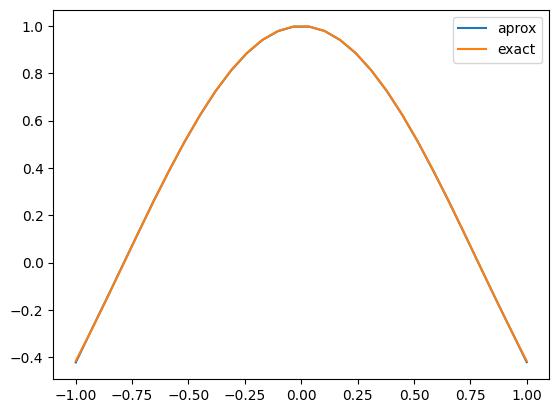

In [14]:
a=model3.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x,tf.math.cos(2.*x), label="exact")
#plt.plot(x,tf.math.pow(x,2.),label="exact")
plt.legend()
plt.show()

In [10]:
model2 = Funsol()
model2.add(polyLayer())
model2.build(input_shape=(1,))
model2.summary()
model2.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])
x=tf.linspace(-1,1,30)
history = model2.fit(x,epochs=10000,verbose=1)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 5ms/step - loss: 0.2586
Epoch 7502/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1792
Epoch 7503/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1661
Epoch 7504/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0653
Epoch 7505/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1174
Epoch 7506/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2129
Epoch 7507/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2073
Epoch 7508/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2469
Epoch 7509/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2005
Epoch 7510/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2388
Epoch 7511/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1433
Epoch 7512/10000
1/1 [=====================

In [13]:
model3 = Funsol()
model3.add(Dense(60, activation = "relu", input_shape=(1,)))
model3.add(Dense(50, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(1))
model3.add(polyLayer())
model3.build(input_shape=(1,))
model3.summary()
model3.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])
x=tf.linspace(-1,1,30)
history = model3.fit(x,epochs=10000,verbose=1)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 8ms/step - loss: 7.9177e-07
Epoch 7502/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.1869e-06
Epoch 7503/10000
1/1 [==============================] - 0s 12ms/step - loss: 6.9826e-07
Epoch 7504/10000
1/1 [==============================] - 0s 12ms/step - loss: 9.2977e-07
Epoch 7505/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.9199e-07
Epoch 7506/10000
1/1 [==============================] - 0s 13ms/step - loss: 1.1655e-06
Epoch 7507/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.1794e-07
Epoch 7508/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.2541e-07
Epoch 7509/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.1989e-07
Epoch 7510/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1833e-06
Epoch 7511/10000
1/1 [==============================] - 0s 11ms/step - loss: 1

In [17]:
class FirstOrderSolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = x*dy + y_pred - x**2*tf.math.cos(x)#Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 0. #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [24]:
class SecondOrdersolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape(persistent=True) as tape:
             tape.watch(x)
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
                 dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             d2y = tape.gradient(dy, x)
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             dy_o = tape.gradient(y_o, x_o)
             if(dy_o==None):
              dy_o=tf.zeros_like(y_o)
             eq = d2y + y_pred#Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             icdy = -0.5
             ic = 1. #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

Se han truncado las últimas 5000 líneas del flujo de salida.
4/4 [==============================] - 2s 22ms/step - loss: 0.9074
Epoch 2/2500
4/4 [==============================] - 0s 8ms/step - loss: 0.5481
Epoch 3/2500
4/4 [==============================] - 0s 13ms/step - loss: 0.4206
Epoch 4/2500
4/4 [==============================] - 0s 11ms/step - loss: 0.3017
Epoch 5/2500
4/4 [==============================] - 0s 8ms/step - loss: 0.2683
Epoch 6/2500
4/4 [==============================] - 0s 9ms/step - loss: 0.1988
Epoch 7/2500
4/4 [==============================] - 0s 8ms/step - loss: 0.1779
Epoch 8/2500
4/4 [==============================] - 0s 8ms/step - loss: 0.1319
Epoch 9/2500
4/4 [==============================] - 0s 8ms/step - loss: 0.1522
Epoch 10/2500
4/4 [==============================] - 0s 9ms/step - loss: 0.1512
Epoch 11/2500
4/4 [==============================] - 0s 8ms/step - loss: 0.1106
Epoch 12/2500
4/4 [==============================] - 0s 10ms/step - loss: 0.14

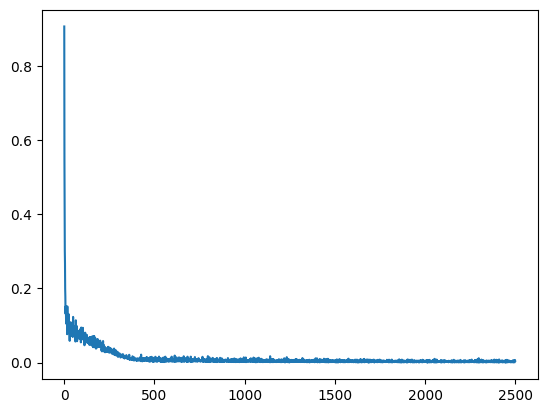

In [27]:
model4 = SecondOrdersolver()

model4.add(Dense(300, activation='tanh', input_shape=(1,)))
model4.add(Dense(15, activation='tanh', input_shape=(1,)))
model4.add(Dense(10, activation='tanh'))
model4.add(Dense(1))


model4.summary()

model4.compile(optimizer=RMSprop(),metrics=['loss'])

x=tf.linspace(-6,6,100)
history = model4.fit(x,epochs=2500,verbose=1)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 4ms/step


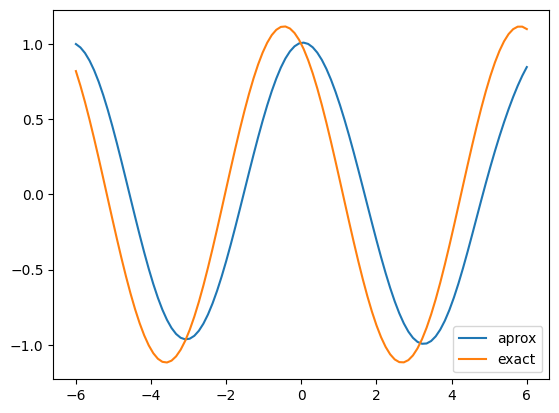

In [28]:
x_testv = tf.linspace(-6,6,100)
a=model4.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,np.cos(x)-0.5*np.sin(x),label="exact")
plt.legend()
plt.show()